Columns in DataFrame:
['filename', 'back_croup-x', 'back_croup-y', 'back_left_hip-x', 'back_left_hip-y', 'back_left_knee-x', 'back_left_knee-y', 'back_left_paw-x', 'back_left_paw-y', 'back_left_wrist-x', 'back_left_wrist-y', 'back_midpoint-x', 'back_midpoint-y', 'back_right_hip-x', 'back_right_hip-y', 'back_right_knee-x', 'back_right_knee-y', 'back_right_paw-x', 'back_right_paw-y', 'back_right_wrist-x', 'back_right_wrist-y', 'back_withers-x', 'back_withers-y', 'chest-x', 'chest-y', 'front_left_elbow-x', 'front_left_elbow-y', 'front_left_paw-x', 'front_left_paw-y', 'front_left_shoulder-x', 'front_left_shoulder-y', 'front_left_wrist-x', 'front_left_wrist-y', 'front_right_elbow-x', 'front_right_elbow-y', 'front_right_paw-x', 'front_right_paw-y', 'front_right_shoulder-x', 'front_right_shoulder-y', 'front_right_wrist-x', 'front_right_wrist-y', 'head_midpoint-x', 'head_midpoint-y', 'left_ear_base-x', 'left_ear_base-y', 'left_ear_tip-x', 'left_ear_tip-y', 'left_eye-x', 'left_eye-y', 'lower_ja

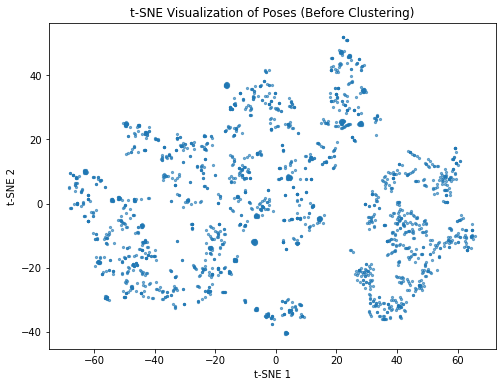

/Users/jonasmucke/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jonasmucke/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jonasmucke/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jonasmucke/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

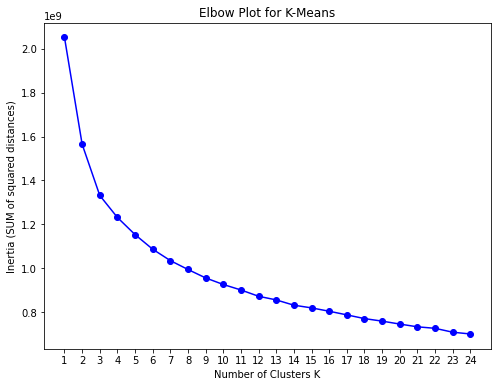

/Users/jonasmucke/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/q8/3qtld8c51tq6rsc2lwvp417w0000gn/T/ipykernel_6065/3262590901.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


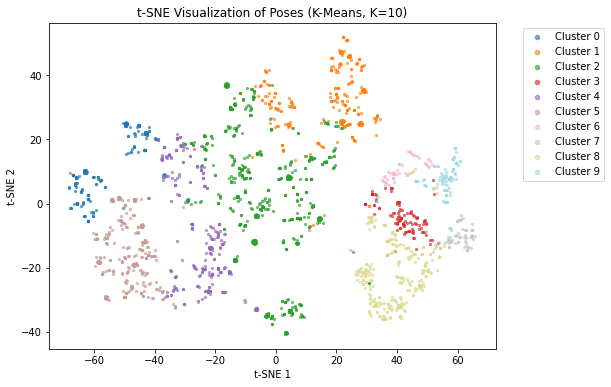


Train set size: 1755
cluster
0    0.074074
1    0.137322
2    0.268376
3    0.049003
4    0.119658
5    0.131054
6    0.022222
7    0.031909
8    0.124217
9    0.042165
Name: proportion, dtype: float64

Validation set size: 219
cluster
0    0.073059
1    0.136986
2    0.269406
3    0.045662
4    0.118721
5    0.132420
6    0.022831
7    0.031963
8    0.123288
9    0.045662
Name: proportion, dtype: float64

Test set size: 220
cluster
0    0.072727
1    0.136364
2    0.268182
3    0.050000
4    0.118182
5    0.131818
6    0.022727
7    0.031818
8    0.127273
9    0.040909
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load the annotations file (change path if needed)
df = pd.read_csv('Rat/side/annotations.csv')

# 1a. Print all column names to confirm
print("Columns in DataFrame:")
print(df.columns.tolist())

# 1b. Build list of columns to drop (filename + any starting with 'bbox_')
drop_cols = []
if 'filename' in df.columns:
    drop_cols.append('filename')
for col in df.columns:
    if col.startswith('bbox_'):
        drop_cols.append(col)

print("\nDropping columns:")
print(drop_cols)

# 1c. Drop those columns
df_filtered = df.drop(columns=drop_cols)

# 2. Extract keypoint data and impute missing values
X_raw = df_filtered.values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X_raw)

# 3. t-SNE BEFORE clustering (visualize raw keypoints)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.6)
plt.title('t-SNE Visualization of Poses (Before Clustering)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# 4. Elbow method: compute inertia for K = 1..15
inertias = []
K_range = range(1, 25)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xticks(K_range)
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia (SUM of squared distances)')
plt.title('Elbow Plot for K-Means')
plt.show()

# 5. Choose K based on the elbow plot (e.g., K = 8 here as an example)
chosen_k = 10
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
df['cluster'] = cluster_labels

# 6. t-SNE AFTER clustering (color by K-Means cluster)
plt.figure(figsize=(8, 6))
unique_labels = np.unique(cluster_labels)
colors = plt.cm.get_cmap('tab20', len(unique_labels))
for lbl in unique_labels:
    idx = (cluster_labels == lbl)
    plt.scatter(
        X_tsne[idx, 0],
        X_tsne[idx, 1],
        s=5,
        alpha=0.6,
        label=f'Cluster {lbl}',
        color=colors(lbl % 20)
    )
plt.title(f't-SNE Visualization of Poses (K-Means, K={chosen_k})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 7. Stratified split into train (80%), val (10%), test (10%) by cluster label
indices = np.arange(len(df))
train_idx, temp_idx, y_train, y_temp = train_test_split(
    indices,
    df['cluster'],
    test_size=0.2,
    stratify=df['cluster'],
    random_state=42
)
val_idx, test_idx, y_val, y_test = train_test_split(
    temp_idx,
    y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

train_df = df.iloc[train_idx].reset_index(drop=True)
val_df   = df.iloc[val_idx].reset_index(drop=True)
test_df  = df.iloc[test_idx].reset_index(drop=True)

print('\nTrain set size:', len(train_df))
print(train_df['cluster'].value_counts(normalize=True).sort_index())

print('\nValidation set size:', len(val_df))
print(val_df['cluster'].value_counts(normalize=True).sort_index())

print('\nTest set size:', len(test_df))
print(test_df['cluster'].value_counts(normalize=True).sort_index())

# 8. (Optional) Save splits to CSV
train_df.to_csv('Rat/side/train_annotations.csv', index=False)
val_df.to_csv('Rat/side/val_annotations.csv', index=False)
test_df.to_csv('Rat/side/test_annotations.csv', index=False)


In [ ]:
# … after dropping bbox + filename, imputing, etc. …
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]

chosen_k = 10
cluster_labels = KMeans(n_clusters=chosen_k, random_state=42).fit_predict(X)
df['cluster'] = cluster_labels

df.to_csv('/Rat/side/annotations_with_clusters.csv', index=False)


/Users/jonasmucke/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
